In [1]:
% matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Dense, InputLayer, Conv2D, MaxPool2D, Flatten

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
seed = 42
rng = np.random.RandomState(seed)

In [3]:
data = pd.read_csv('../datasets/emergency_classification/emergency_classification.csv')

In [4]:
X = []
for img_name in data.image_names:
    img = plt.imread('../datasets/emergency_classification/images/' + img_name)
    X.append(img)
    
X = np.array(X)

y = data.emergency_or_not.values

In [5]:
X.shape

(2352, 224, 224, 3)

In [6]:
X = X / X.max()

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=seed)

In [8]:
model = Sequential()

model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(filters=25, kernel_size=(5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(filters=50, kernel_size=(5, 5), activation='relu', strides=(1, 1), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 220, 220, 25)      1900      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 216, 216, 50)      31300     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2332800)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               233280100 
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 233,313,401
Trainable params: 233,313,401
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [11]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 14s 9ms/step - loss: 0.6901 - acc: 0.5996 - val_loss: 0.6500 - val_acc: 0.6459
Epoch 2/10
1646/1646 [==============================] - 10s 6ms/step - loss: 0.5973 - acc: 0.6817 - val_loss: 0.5792 - val_acc: 0.6912
Epoch 3/10
1646/1646 [==============================] - 10s 6ms/step - loss: 0.5482 - acc: 0.7296 - val_loss: 0.5583 - val_acc: 0.7153
Epoch 4/10
1646/1646 [==============================] - 10s 6ms/step - loss: 0.5190 - acc: 0.7467 - val_loss: 0.5375 - val_acc: 0.7195
Epoch 5/10
1646/1646 [==============================] - 10s 6ms/step - loss: 0.4858 - acc: 0.7776 - val_loss: 0.5190 - val_acc: 0.7394
Epoch 6/10
1646/1646 [==============================] - 10s 6ms/step - loss: 0.4457 - acc: 0.8001 - val_loss: 0.4896 - val_acc: 0.7564
Epoch 7/10
1646/1646 [==============================] - 10s 6ms/step - loss: 0.4276 - acc: 0.8086 - val_loss: 0.4783 - val_acc: 0.7564
Epoch 8/

In [12]:
model = Sequential()

model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(filters=25, kernel_size=(5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(filters=50, kernel_size=(5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 220, 220, 25)      1900      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 216, 216, 50)      31300     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 50)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 145800)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               14580100  
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 14,613,401
Trainable params: 14,613,401
Non-trainable params: 0
________________________________________________________________

In [14]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 8s 5ms/step - loss: 0.6623 - acc: 0.5899 - val_loss: 0.6557 - val_acc: 0.5623
Epoch 2/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6208 - acc: 0.6604 - val_loss: 0.6158 - val_acc: 0.6204
Epoch 3/10
1646/1646 [==============================] - 7s 5ms/step - loss: 0.5904 - acc: 0.6944 - val_loss: 0.5583 - val_acc: 0.7280
Epoch 4/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.5469 - acc: 0.7467 - val_loss: 0.6911 - val_acc: 0.5581
Epoch 5/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.5196 - acc: 0.7454 - val_loss: 0.5396 - val_acc: 0.7380
Epoch 6/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.4952 - acc: 0.7722 - val_loss: 0.5238 - val_acc: 0.7295
Epoch 7/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.4830 - acc: 0.7831 - val_loss: 0.5187 - val_acc: 0.7422
Epoch 8/10
1646

There is 23 % chance that it is an emergency vehicle
whereas actual class is 0


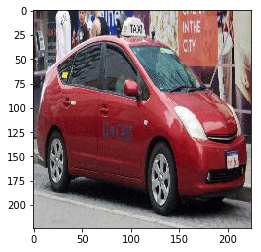

In [15]:
predictions = model.predict_classes(X_valid)[:, 0]
prediction_probabilities = model.predict(X_valid)[:, 0]

_, valid_vehicles, _, _ = train_test_split(data.image_names.values, y, test_size=0.3, random_state=seed)

index = rng.choice(range(len(valid_vehicles)))

img_name = valid_vehicles[index]
prob = (prediction_probabilities * 100).astype(int)[index]

img = plt.imread('../datasets/emergency_classification/images/' + img_name)

print('There is', prob, '% chance that it is an emergency vehicle')
print('whereas actual class is', y_valid[index])

plt.imshow(img)

There is 29 % chance that it is an emergency vehicle
whereas actual class is 1


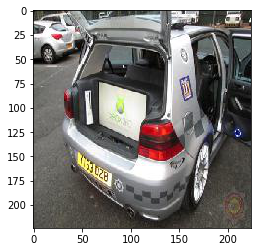

In [16]:
incorrect_indices = np.where(predictions != y_valid)[0]

index = rng.choice(incorrect_indices)
img_name = valid_vehicles[index]

prob = (prediction_probabilities * 100).astype(int)[index]

img = plt.imread('../datasets/emergency_classification/images/' + img_name)

print('There is', prob, '% chance that it is an emergency vehicle')
print('whereas actual class is', y_valid[index])

plt.imshow(img)

In [17]:
# change activation function of hidden layer
# increase hidden neurons
# increase hidden layers
# increase number of epochs
# change optimizer

# increase number of convolutional layers
# increase number of pooling layers
# increase number of convolutional filters
# change size of convolutional filter
# change size of pooling
# change padding technique
# change stride

In [19]:
# increase number of convolutional and pooling layers

model = Sequential()

model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(filters=25, kernel_size=(5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(filters=50, kernel_size=(5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Conv2D(filters=100, kernel_size=(5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 220, 220, 25)      1900      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 216, 216, 50)      31300     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 50)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 50, 50, 100)       125100    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 100)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 14400)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1440100   
__________

In [21]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6783 - acc: 0.5863 - val_loss: 0.6842 - val_acc: 0.5609
Epoch 2/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6755 - acc: 0.5863 - val_loss: 0.6805 - val_acc: 0.5609
Epoch 3/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6731 - acc: 0.5863 - val_loss: 0.6776 - val_acc: 0.5609
Epoch 4/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6706 - acc: 0.5863 - val_loss: 0.6760 - val_acc: 0.5609
Epoch 5/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6660 - acc: 0.5863 - val_loss: 0.6737 - val_acc: 0.5609
Epoch 6/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6614 - acc: 0.5863 - val_loss: 0.6668 - val_acc: 0.5609
Epoch 7/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6538 - acc: 0.5966 - val_loss: 0.6553 - val_acc: 0.5637
Epoch 8/10
1646

In [22]:
# increase number of convolutional filters

model = Sequential()

model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(filters=125, kernel_size=(5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(filters=150, kernel_size=(5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Conv2D(filters=200, kernel_size=(5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [23]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 22s 13ms/step - loss: 0.6793 - acc: 0.5863 - val_loss: 0.6844 - val_acc: 0.5609
Epoch 2/10
1646/1646 [==============================] - 18s 11ms/step - loss: 0.6754 - acc: 0.5863 - val_loss: 0.6833 - val_acc: 0.5609
Epoch 3/10
1646/1646 [==============================] - 18s 11ms/step - loss: 0.6727 - acc: 0.5863 - val_loss: 0.6774 - val_acc: 0.5609
Epoch 4/10
1646/1646 [==============================] - 19s 11ms/step - loss: 0.6698 - acc: 0.5863 - val_loss: 0.6737 - val_acc: 0.5609
Epoch 5/10
1646/1646 [==============================] - 19s 11ms/step - loss: 0.6642 - acc: 0.5863 - val_loss: 0.6715 - val_acc: 0.5609
Epoch 6/10
1646/1646 [==============================] - 19s 11ms/step - loss: 0.6562 - acc: 0.5936 - val_loss: 0.6566 - val_acc: 0.5623
Epoch 7/10
1646/1646 [==============================] - 19s 11ms/step - loss: 0.6438 - acc: 0.6154 - val_loss: 0.6408 - val_acc: 0.6020
E

In [24]:
# change filter size for convolutional layer and pooling size for pooling layer

from keras.layers import GlobalMaxPool2D

model = Sequential()

model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(filters=125, kernel_size=(5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(filters=150, kernel_size=(5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(8, 8), padding='valid'))

model.add(Conv2D(filters=200, kernel_size=(3, 3), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(filters=225, kernel_size=(3, 3), activation='relu', strides=(1, 1), padding='valid'))

model.add(GlobalMaxPool2D())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 220, 220, 125)     9500      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 216, 216, 150)     468900    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 27, 27, 150)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 25, 25, 200)       270200    
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 23, 23, 225)       405225    
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 225)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               22600     
__________

In [26]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 18s 11ms/step - loss: 0.6923 - acc: 0.5328 - val_loss: 0.6882 - val_acc: 0.5609
Epoch 2/10
1646/1646 [==============================] - 18s 11ms/step - loss: 0.6784 - acc: 0.5863 - val_loss: 0.6888 - val_acc: 0.5609
Epoch 3/10
1646/1646 [==============================] - 18s 11ms/step - loss: 0.6785 - acc: 0.5863 - val_loss: 0.6863 - val_acc: 0.5609
Epoch 4/10
1646/1646 [==============================] - 18s 11ms/step - loss: 0.6784 - acc: 0.5863 - val_loss: 0.6873 - val_acc: 0.5609
Epoch 5/10
1646/1646 [==============================] - 18s 11ms/step - loss: 0.6778 - acc: 0.5863 - val_loss: 0.6857 - val_acc: 0.5609
Epoch 6/10
1646/1646 [==============================] - 18s 11ms/step - loss: 0.6778 - acc: 0.5863 - val_loss: 0.6849 - val_acc: 0.5609
Epoch 7/10
1646/1646 [==============================] - 18s 11ms/step - loss: 0.6778 - acc: 0.5863 - val_loss: 0.6880 - val_acc: 0.5609
E

In [27]:
# change padding technique

model = Sequential()

model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(filters=125, kernel_size=(5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(filters=150, kernel_size=(5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(8, 8), padding='valid'))

model.add(Conv2D(filters=200, kernel_size=(3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(filters=225, kernel_size=(3, 3), activation='relu', strides=(1, 1), padding='same'))

model.add(GlobalMaxPool2D())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 23s 14ms/step - loss: 0.6853 - acc: 0.5638 - val_loss: 0.6823 - val_acc: 0.5609
Epoch 2/10
1646/1646 [==============================] - 19s 11ms/step - loss: 0.6663 - acc: 0.5826 - val_loss: 0.6435 - val_acc: 0.5609
Epoch 3/10
1646/1646 [==============================] - 19s 12ms/step - loss: 0.5952 - acc: 0.6896 - val_loss: 0.5345 - val_acc: 0.7408
Epoch 4/10
1646/1646 [==============================] - 19s 12ms/step - loss: 0.5142 - acc: 0.7552 - val_loss: 0.5187 - val_acc: 0.7578
Epoch 5/10
1646/1646 [==============================] - 19s 12ms/step - loss: 0.4716 - acc: 0.7843 - val_loss: 0.4725 - val_acc: 0.7833
Epoch 6/10
1646/1646 [==============================] - 19s 12ms/step - loss: 0.4693 - acc: 0.7953 - val_loss: 0.4667 - val_acc: 0.7819
Epoch 7/10
1646/1646 [==============================] - 19s 12ms/step - loss: 0.4264 - acc: 0.8074 - val_loss: 0.5333 - val_acc: 0.7705
E

In [29]:
# change stride

model = Sequential()

model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(filters=125, kernel_size=(5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(Conv2D(filters=150, kernel_size=(5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(8, 8), padding='valid'))

model.add(Conv2D(filters=200, kernel_size=(3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(Conv2D(filters=225, kernel_size=(3, 3), activation='relu', strides=(2, 2), padding='same'))

model.add(GlobalMaxPool2D())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 112, 112, 125)     9500      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 56, 56, 150)       468900    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 150)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 4, 4, 200)         270200    
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 2, 2, 225)         405225    
_________________________________________________________________
global_max_pooling2d_3 (Glob (None, 225)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               22600     
__________

In [31]:
model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/15
1646/1646 [==============================] - 8s 5ms/step - loss: 0.6815 - acc: 0.6112 - val_loss: 0.6385 - val_acc: 0.6445
Epoch 2/15
1646/1646 [==============================] - 7s 4ms/step - loss: 0.5546 - acc: 0.7254 - val_loss: 0.5167 - val_acc: 0.7380
Epoch 3/15
1646/1646 [==============================] - 7s 4ms/step - loss: 0.4777 - acc: 0.7740 - val_loss: 0.5212 - val_acc: 0.7323
Epoch 4/15
1646/1646 [==============================] - 7s 4ms/step - loss: 0.4210 - acc: 0.8123 - val_loss: 0.4273 - val_acc: 0.8074
Epoch 5/15
1646/1646 [==============================] - 7s 4ms/step - loss: 0.3786 - acc: 0.8348 - val_loss: 0.3851 - val_acc: 0.8244
Epoch 6/15
1646/1646 [==============================] - 7s 4ms/step - loss: 0.3121 - acc: 0.8724 - val_loss: 0.4075 - val_acc: 0.8201
Epoch 7/15
1646/1646 [==============================] - 7s 4ms/step - loss: 0.2663 - acc: 0.8858 - val_loss: 0.3781 - val_acc: 0.8442
Epoch 8/15
1646

![original](../notebooks/images/original_vgg_model.png)

In [32]:
# VGG equivalent

model = Sequential()
model.add(InputLayer(input_shape=(224,224,3)))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 128, kernel_size = (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 512, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 512, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 512, kernel_size = (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units = 1024, activation ='sigmoid'))
model.add(Dense(units=1, activation = 'sigmoid'))


model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [33]:
model.fit(X_train, y_train, epochs=200, validation_data=(X_valid, y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/200
1646/1646 [==============================] - 18s 11ms/step - loss: 0.6860 - acc: 0.5826 - val_loss: 0.6907 - val_acc: 0.5609
Epoch 2/200
1646/1646 [==============================] - 15s 9ms/step - loss: 0.6872 - acc: 0.5802 - val_loss: 0.6884 - val_acc: 0.5609
Epoch 3/200
1646/1646 [==============================] - 15s 9ms/step - loss: 0.6853 - acc: 0.5729 - val_loss: 0.6891 - val_acc: 0.5609
Epoch 4/200
1646/1646 [==============================] - 16s 9ms/step - loss: 0.6840 - acc: 0.5680 - val_loss: 0.7088 - val_acc: 0.5609
Epoch 5/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.6881 - acc: 0.5632 - val_loss: 0.6868 - val_acc: 0.5609
Epoch 6/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.6888 - acc: 0.5595 - val_loss: 0.6881 - val_acc: 0.5609
Epoch 7/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.6894 - acc: 0.5705 - val_loss: 0.6893 - val_acc: 0.56

1646/1646 [==============================] - 16s 10ms/step - loss: 0.6799 - acc: 0.5778 - val_loss: 0.7404 - val_acc: 0.5609
Epoch 61/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.6856 - acc: 0.5844 - val_loss: 0.6842 - val_acc: 0.5609
Epoch 62/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.6816 - acc: 0.5857 - val_loss: 0.6920 - val_acc: 0.5609
Epoch 63/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.6830 - acc: 0.5729 - val_loss: 0.6879 - val_acc: 0.5609
Epoch 64/200
1646/1646 [==============================] - 16s 9ms/step - loss: 0.6839 - acc: 0.5656 - val_loss: 0.6858 - val_acc: 0.5609
Epoch 65/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.6831 - acc: 0.5869 - val_loss: 0.6832 - val_acc: 0.5609
Epoch 66/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.6835 - acc: 0.5753 - val_loss: 0.6885 - val_acc: 0.5609
Epoch 67/200
1646/1646 [========================

1646/1646 [==============================] - 16s 10ms/step - loss: 0.2861 - acc: 0.8767 - val_loss: 0.4223 - val_acc: 0.8244
Epoch 120/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.2789 - acc: 0.8779 - val_loss: 0.5364 - val_acc: 0.7805
Epoch 121/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.2665 - acc: 0.8870 - val_loss: 0.4426 - val_acc: 0.8329
Epoch 122/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.2498 - acc: 0.8900 - val_loss: 0.4387 - val_acc: 0.8343
Epoch 123/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.2749 - acc: 0.8767 - val_loss: 0.4270 - val_acc: 0.8300
Epoch 124/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.2322 - acc: 0.9077 - val_loss: 0.4998 - val_acc: 0.8031
Epoch 125/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.1974 - acc: 0.9192 - val_loss: 0.4304 - val_acc: 0.8385
Epoch 126/200
1646/1646 [================

1646/1646 [==============================] - 16s 10ms/step - loss: 0.0045 - acc: 0.9976 - val_loss: 0.6324 - val_acc: 0.8527
Epoch 179/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.0045 - acc: 0.9957 - val_loss: 0.6319 - val_acc: 0.8513
Epoch 180/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.0044 - acc: 0.9964 - val_loss: 0.6367 - val_acc: 0.8513
Epoch 181/200
1646/1646 [==============================] - 15s 9ms/step - loss: 0.0044 - acc: 0.9976 - val_loss: 0.6370 - val_acc: 0.8527
Epoch 182/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.0044 - acc: 0.9970 - val_loss: 0.6371 - val_acc: 0.8527
Epoch 183/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.0044 - acc: 0.9970 - val_loss: 0.6398 - val_acc: 0.8527
Epoch 184/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.0044 - acc: 0.9964 - val_loss: 0.6389 - val_acc: 0.8513
Epoch 185/200
1646/1646 [=================